# KRIMINALITETA V SLOVENIJI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import PIL
import math

In [2]:
#pd.set_option("display.max_columns", None) # vsi stolpci vidni
#pd.set_option("display.max_rows", None) # vse vrstice vidne

In [3]:
df = pd.read_csv("data/fizicne-osebe/obsojene-vse/vsi_obcine_letno.csv", encoding="Windows-1250") # CSV datoteka uporablja "Windows-1250" kodiranje
df

,OBČINE,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2006,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2007,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2008,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2009,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2010,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2011,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2012,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2013,Obsojeni polnoletni in mladoletni na 1000 prebivalcev 2014,...,Število obsojenih polnoletnih in mladoletnih oseb 2012,Število obsojenih polnoletnih in mladoletnih oseb 2013,Število obsojenih polnoletnih in mladoletnih oseb 2014,Število obsojenih polnoletnih in mladoletnih oseb 2015,Število obsojenih polnoletnih in mladoletnih oseb 2016,Število obsojenih polnoletnih in mladoletnih oseb 2017,Število obsojenih polnoletnih in mladoletnih oseb 2018,Število obsojenih polnoletnih in mladoletnih oseb 2019,Število obsojenih polnoletnih in mladoletnih oseb 2020,Število obsojenih polnoletnih in mladoletnih oseb 2021
0,SLOVENIJA,4.3,4.5,4.6,4.1,4.1,3.9,4.3,5.7,4.7,...,8825,11758,9729,8241,7006,6521,6324,6256,5007,5974
1,Ajdovščina,2.9,2.3,1.6,1.4,1.8,1.4,2.9,1.8,1.9,...,56,34,35,30,34,31,43,17,18,35
2,Ankaran/Ancarano,-,-,-,-,-,-,-,-,z,...,-,-,z,z,4,3,12,5,z,4
3,Apače,0.0,3.3,5.2,6.4,5.8,5.2,5.0,5.3,5.0,...,18,19,18,20,15,7,12,7,8,12
4,Beltinci,5.1,3.8,4.2,3.0,3.0,3.5,6.0,5.8,5.9,...,50,48,49,43,26,26,35,28,27,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Žetale,2.1,z,2.2,5.2,z,2.2,5.2,3.0,3.7,...,7,4,5,3,3,z,6,z,z,z
210,Žiri,1.2,1.6,2.0,1.0,z,1.0,0.8,1.8,0.8,...,4,9,4,9,4,3,4,z,7,6
211,Žirovnica,2.4,1.2,2.6,1.9,1.6,1.8,1.6,1.1,1.4,...,7,5,6,5,8,6,7,5,5,12
212,Žužemberk,0.7,2.6,2.9,1.1,1.3,2.4,1.7,2.0,3.1,...,8,9,14,10,8,9,3,z,4,z


In [4]:
# za preimenovanje imen občin (izogibanje šumnikov ipd.)
def transform_text(text):
    return text.strip().lower().replace(" ", "-").replace("š", "s").replace("č", "c").replace("ž", "z").replace("---", "-").replace(".", "").split("/")[0]

# seznam barv
def generate_color_scale():
    return ["#00ff00", "#33ff00", "#66ff00", "#9aff00", "#cdff00", # zelena
              "#ffff00", "#ffed00", "#ffdb00", "#ffc900", "#ffb700", # rumena
              "#ffa500", "#ff8400", "#ff6300", "#ff4200", "#ff2100", # oranžna
              "#ff0000", "#de0000", "#bd0000", "#9c0000", "#7b0000"] # rdeča

# mapiranje barv na podlagi števila
def map_color(n):
    if (n == "-" or n == "z"):
        return "#7E7E7E"
    colors = generate_color_scale()
    return colors[math.floor(float(n) / 0.5)] if float(n) < 10.0 else "#000000"

# dobi ID nekega poligona v SVG
def get_id(line):
    index1 = line.find("\"")+1
    index2 = line.find("\"", line.find("\"")+1)
    return line[index1:index2]

In [5]:
# naredi SVG-je za vsa leta in jih shrani v "output/" direktorij

years = range(2006, 2022) # 2006, 2007, 2008, ... 2019, 2020, 2021

for year in years:
    crime_rate = df.set_index("OBČINE")[f"Obsojeni polnoletni in mladoletni na 1000 prebivalcev {year}"].to_dict()
    crime_rate = {transform_text(k): v for k, v in crime_rate.items()}

    f = open(f"output/slovenia_municipalities_{year}.svg", mode="w")
    for line in open("other/slovenia_municipalities.svg", mode="r"):
        line = line.strip()
        if line.startswith("<title>"):
            for line in open("other/svg_legenda.txt", mode="r"):
                f.write(line)
            f.write(f'<text x="20" y="100" style="font-weight: bold; font-size:64px; font-family:Helvetica; fill:black;">Leto: {year}</text>' + "\n")
        if line.startswith("<path"):
            index = line.find("\"", line.find("\"")+1) + 1
            line = line[:index] + f' fill="{map_color(crime_rate[get_id(line)])}" ' + line[index+1:]
        f.write(line + "\n")
    f.close()

In [6]:
# SVG v PNG

import os
import cairosvg

[cairosvg.svg2png(url=f"output/{svg_file}", write_to=f"output/{svg_file}.png") for svg_file in os.listdir("output")];

In [7]:
# PNG v GIF

import imageio

directory = "output/"
output_path = "output/output_medium.gif"
png_filenames = [filename for filename in os.listdir(directory) if filename.endswith('.png')]
png_filenames.sort()
png_paths = [os.path.join(directory, filename) for filename in png_filenames]
with imageio.get_writer(output_path, mode="I", duration=0.5) as writer:
    for png_path in png_paths:
        img = imageio.v2.imread(png_path)
        writer.append_data(img)

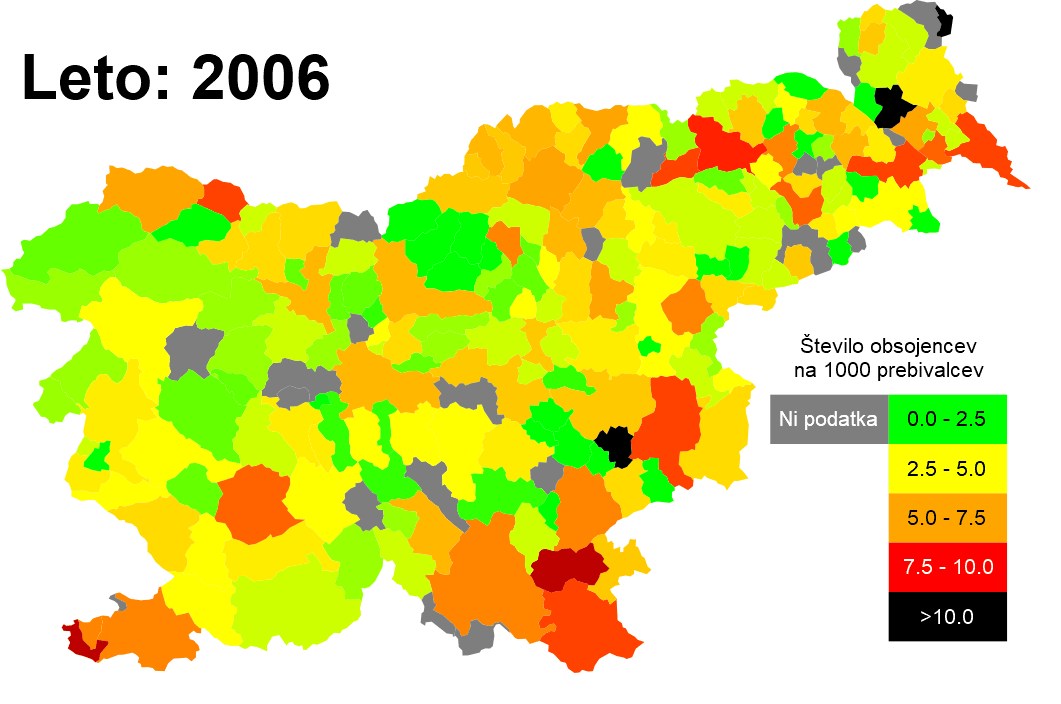

In [8]:
Image(open("output/output_medium.gif","rb").read())

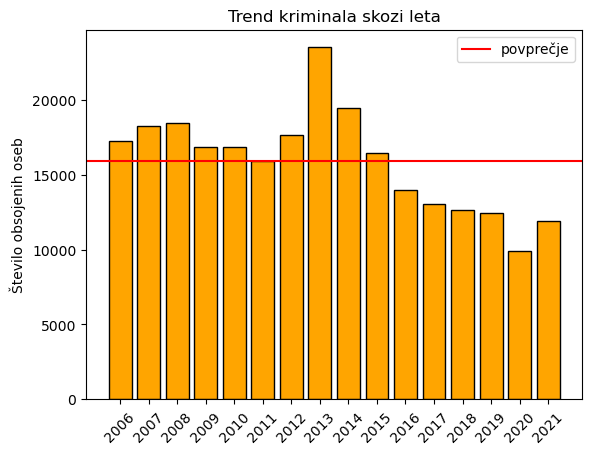

In [9]:
years = range(2006, 2022)
all = []

for year in years:
    all.append(pd.to_numeric(df[f"Število obsojenih polnoletnih in mladoletnih oseb {year}"].replace("-", np.nan).replace("z", np.nan)).sum())
s = pd.Series(all).dropna()

plt.bar([str(year) for year in years], s, color="orange", edgecolor="black")
plt.axhline(s.mean(), color="red", label="povprečje")
plt.title("Trend kriminala skozi leta")
plt.ylabel("Število obsojenih oseb")
plt.xticks(rotation=45)
plt.legend();